In [3]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
%store -r new_df


In [5]:
digital = new_df

In [6]:
digital.describe()

,Access Electricity,Cellular %,Fixed broadband %,GDP pcp PPP,Landline %,Secure Servers,Urbanisation,internet_users
count,3572.000000,3924.000000,3904.000000,3915.000000,3916.000000,3896.000000,3948.000000,3889.000000
mean,75.070279,57.219870,541.798200,14459.653033,18.929920,3349.633291,55.447683,23.656629
std,33.478636,52.491984,977.152958,17900.726057,18.984450,25668.442665,24.154125,27.131545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.412000,0.000000
25%,49.973213,5.686211,0.000000,2509.293321,2.553715,0.000000,34.862750,1.631095
50%,96.100000,47.621538,17.010518,7700.877635,12.541545,12.000000,55.378000,10.629391
75%,100.000000,100.603396,583.959213,19947.832275,30.149605,191.000000,74.494250,40.720000
max,100.000000,332.090701,6173.884929,140037.115597,110.191151,530309.000000,100.000000,98.323610


Charts to visualize: First, let's take a look at distribution of internet_users by year/country

ValueError: cannot convert float NaN to integer

/home/antonia/.conda/envs/my_root/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


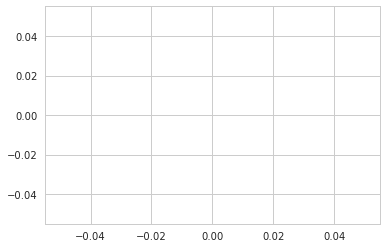